In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [14]:
eps1 = 1 
eps2 = 3 
thi = np.deg2rad(np.arange(0,90,5))
tht = np.arcsin((eps1/eps2)**0.5 * np.sin(thi))

In [15]:
rh = np.square((eps1**0.5 * np.cos(thi) - eps2**0.5 * np.cos(tht)) / (eps1**0.5 * np.cos(thi) + eps2**0.5 * np.cos(tht)))
rv = np.square((eps1**0.5 * np.cos(tht) - eps2**0.5 * np.cos(thi)) / (eps1**0.5 * np.cos(tht) + eps2**0.5 * np.cos(thi)))
th = np.square((2*eps1**0.5 * np.cos(thi)) / (eps1**0.5 * np.cos(thi) + eps2**0.5 * np.cos(tht))) * (eps2**0.5 * np.cos(tht) / eps1**0.5 / np.cos(thi))
tv = np.square((2*eps1**0.5 * np.cos(thi)) / (eps1**0.5 * np.cos(tht) + eps2**0.5 * np.cos(thi))) * (eps2**0.5 * np.cos(tht) / eps1**0.5 / np.cos(thi))
print(np.rad2deg(thi))
print(rh)
print(th)

[ 0.  5. 10. 15. 20. 25. 30. 35. 40. 45. 50. 55. 60. 65. 70. 75. 80. 85.]
[0.07179677 0.0724309  0.07436708 0.07770948 0.08264156 0.08944176
 0.09850768 0.11039102 0.12584637 0.14589803 0.17192957 0.20580131
 0.25       0.30782226 0.38358702 0.48286185 0.61267213 0.78164243]
[0.92820323 0.9275691  0.92563292 0.92229052 0.91735844 0.91055824
 0.90149232 0.88960898 0.87415363 0.85410197 0.82807043 0.79419869
 0.75       0.69217774 0.61641298 0.51713815 0.38732787 0.21835757]


In [23]:
k = 2*np.pi / 12.6e-2
s = 2e-2
loss = np.exp(-1*(k*s)**2*np.cos(thi)**2 )         ## neglecting cos theta part because cos 0 = 1 for nadir
rh_vrough = rh*np.exp(-1*(k*4e-2)**2*np.cos(thi)**2 )
rh_mrough = rh*np.exp(-1*(k*2e-2)**2*np.cos(thi)**2 )

In [24]:
print(k*s)

0.9973310011396168


/home/iganesh/anaconda3/envs/radar/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/iganesh/anaconda3/envs/radar/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/iganesh/anaconda3/envs/radar/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/iganesh/anaconda3/envs/radar/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


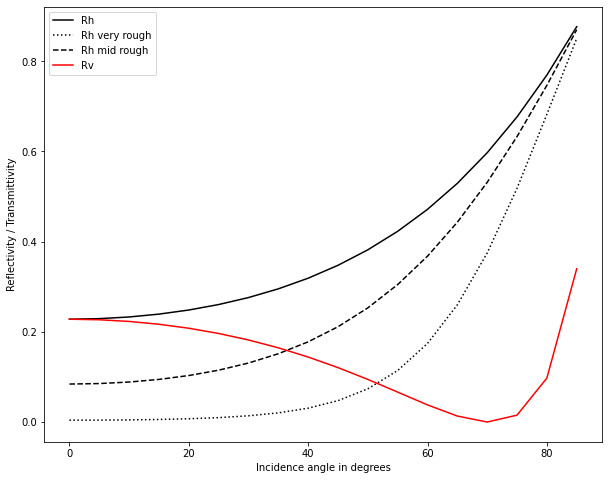

In [25]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10, 8)
ax.plot(np.rad2deg(thi), rh, 'k', label = "Rh")
ax.plot(np.rad2deg(thi), rh_vrough, 'k:', label = "Rh very rough")
ax.plot(np.rad2deg(thi), rh_mrough, 'k--', label = "Rh mid rough")
ax.plot(np.rad2deg(thi), rv, 'r', label = "Rv")
# ax.plot(np.rad2deg(thi), th, 'k', label = "Th")
# ax.plot(np.rad2deg(thi), tv, 'r', label = "Tv")
ax.set_xlabel("Incidence angle in degrees")
ax.set_ylabel("Reflectivity / Transmittivity")
plt.legend()
plt.show()

In [26]:
print(rh[0], rh_mrough[0], rh_vrough[0])

(0.228094358531401+2.304100947490271e-05j) (0.08435973975857461+8.521620506497782e-06j) (0.00426773351342934+4.311061832147334e-07j)


In [6]:
# rh = np.square((1-eps2)/(1+eps2))
# C = 1 / np.tan(np.deg2rad(10))**2
# rh = 1
# print(rh, np.tan(np.deg2rad(10)))

In [7]:
# sigma_gaussian = C*rh*np.exp(-C*np.tan(thi)**2) / np.cos(thi)**4
# sigma_exp = 3*C*rh*np.exp(-(6*C)**0.5*np.tan(thi)) / np.cos(thi)**4
# sigma_hagfors = (C*rh/2) * (np.cos(thi)**4 + C*np.sin(thi)**2)**-1.5

In [8]:
# fig, ax = plt.subplots(1,1)
# fig.set_size_inches(10, 8)
# ax.plot(np.rad2deg(thi), np.log10(sigma_gaussian), 'k')
# ax.plot(np.rad2deg(thi), np.log10(sigma_exp), 'red')
# ax.plot(np.rad2deg(thi), np.log10(sigma_hagfors), 'green')
# plt.show()

In [37]:
rms_slope = np.tan(np.deg2rad(5))
C = 1/ math.pow(rms_slope,2)
rh=0.03
v_exp = rms_slope * 6**0.5
v_gau = rms_slope

In [38]:
sigma_hagfors = (C*rh/2)/(np.cos(thi)**4 + C*np.sin(thi)**2)**1.5
sigma_gaussian = (rh / v_gau**2 * np.cos(thi)**4) * np.exp(-1*np.tan(thi)**2/v_gau**2)
sigma_exp = (rh / 2*v_exp**2 * np.cos(thi)**4) * np.exp(-1*np.tan(thi)/v_exp)

/home/iganesh/anaconda3/envs/radar/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


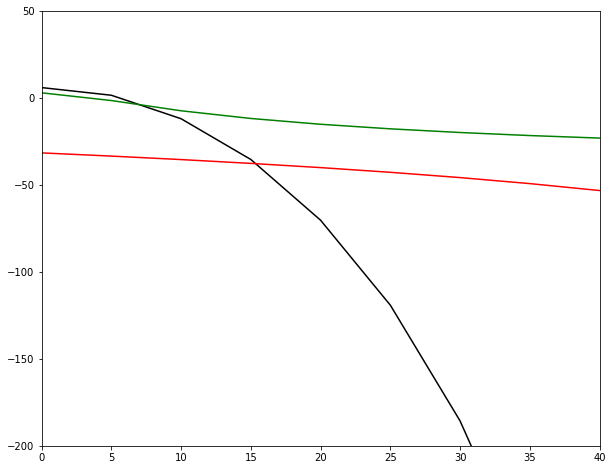

In [39]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10, 8)
ax.plot(np.rad2deg(thi), 10*np.log10(sigma_gaussian), 'k')
ax.plot(np.rad2deg(thi), 10*np.log10(sigma_exp), 'red')
ax.plot(np.rad2deg(thi), 10*np.log10(sigma_hagfors), 'green')
ax.set_xlim(0,40)
ax.set_ylim(-200, 50)
plt.show()

In [33]:
eps2 = 2
rh = np.square((1-eps2**0.5)/(1+eps2**0.5))
print(rh)

0.029437251522859434
